# Data on Large Combustion Plants (LCPs)

#### EU Member States have been reporting detailed LCP (combustion plants with a rated thermal input equal or greater than 50MW) data since 2004. These plants used to be covered by the LCP Directive (2001/80/EC, no longer in force) and are now in the scope of the Industrial Emissions Directive (IED 2010/75/EU).

#### Plants have to report annually their rated thermal input, emissions of nitrous oxides (NOx), sulphur dioxide (SO2) and particulate matter (tonnes), as well as their operating hours and fuel use (TJ) (except for certain Member States which have requested this information be withheld from publication for reasons of confidentiality).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_air = pd.read_csv("F1_2_Total Release at E-PRTR Sector Level into Air.csv")
df_water = pd.read_csv("F2_2_Total Release at E-PRTR Sector Level into Water.csv")

In [3]:
df_air.head()

,countryName,EPRTRSectorCode,eprtrSectorName,targetRelease,pollutant,reportingYear,emissions
0,Austria,1.0,Energy sector,AIR,Carbon dioxide (CO2),2007,2.870000e+09
1,Austria,1.0,Energy sector,AIR,Nitrogen oxides (NOX),2007,3.050000e+06
2,Austria,1.0,Energy sector,AIR,Particulate matter (PM10),2007,9.250000e+04
3,Austria,1.0,Energy sector,AIR,Sulphur oxides (SOX),2007,3.230000e+06
4,Austria,1.0,Energy sector,AIR,Carbon dioxide (CO2),2007,8.454000e+09


In [40]:
df_water.head()

,countryName,EPRTRSectorCode,eprtrSectorName,targetRelease,reportingYear,pollutant,emissions
0,Austria,1.0,Energy sector,WATER,2007,Arsenic and compounds (as As),5.7
1,Austria,1.0,Energy sector,WATER,2007,Phenols (as total C),322.0
2,Austria,1.0,Energy sector,WATER,2007,Zinc and compounds (as Zn),495.0
3,Austria,1.0,Energy sector,WATER,2007,Copper and compounds (as Cu),2259.0
4,Austria,1.0,Energy sector,WATER,2007,Zinc and compounds (as Zn),668.0


L'émission moyenne par an par pays

countryName,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom,All
reportingYear,,,,,,,,,,,,,,,,,,,,,
2007,4.030774e+08,2.000846e+08,5.212162e+08,NaN,2.388353e+08,4.338654e+08,3.665754e+08,6.886703e+08,4.429652e+08,2.563505e+08,...,1.342762e+08,6.246396e+08,NaN,4.612613e+07,2.016689e+08,4.237094e+08,3.240580e+08,5.313723e+07,6.442285e+08,4.896211e+08
2008,4.269692e+08,1.999889e+08,4.249523e+08,NaN,2.549693e+08,4.390644e+08,3.144813e+08,6.015592e+08,4.237532e+08,2.510668e+08,...,1.301306e+08,6.194964e+08,NaN,4.543133e+07,2.308943e+08,3.950261e+08,3.490738e+08,4.988387e+07,6.521682e+08,4.792568e+08
2009,3.860683e+08,1.866537e+08,4.561927e+08,NaN,2.539194e+08,4.383038e+08,3.687949e+08,6.007339e+08,6.350992e+08,2.038314e+08,...,1.769630e+08,5.863070e+08,1.144000e+06,1.108047e+08,1.593628e+08,3.625743e+08,3.935134e+08,4.648073e+07,7.318598e+08,4.935463e+08
2010,4.442006e+08,1.940821e+08,5.274585e+08,NaN,2.512421e+08,7.301997e+08,4.100573e+08,7.935368e+08,7.660192e+08,2.484347e+08,...,1.513672e+08,6.069747e+08,2.630000e+05,1.261292e+08,1.334505e+08,3.369527e+08,4.542026e+08,5.000909e+07,7.436551e+08,5.358231e+08
2011,4.169896e+08,1.864568e+08,6.159308e+08,NaN,2.259096e+08,7.405542e+08,2.847964e+08,7.652348e+08,6.937188e+08,2.268720e+08,...,1.774200e+08,6.137163e+08,4.351333e+05,1.535356e+08,1.398062e+08,3.718870e+08,4.194395e+08,4.770111e+07,7.032246e+08,5.322363e+08


<Figure size 432x288 with 0 Axes>

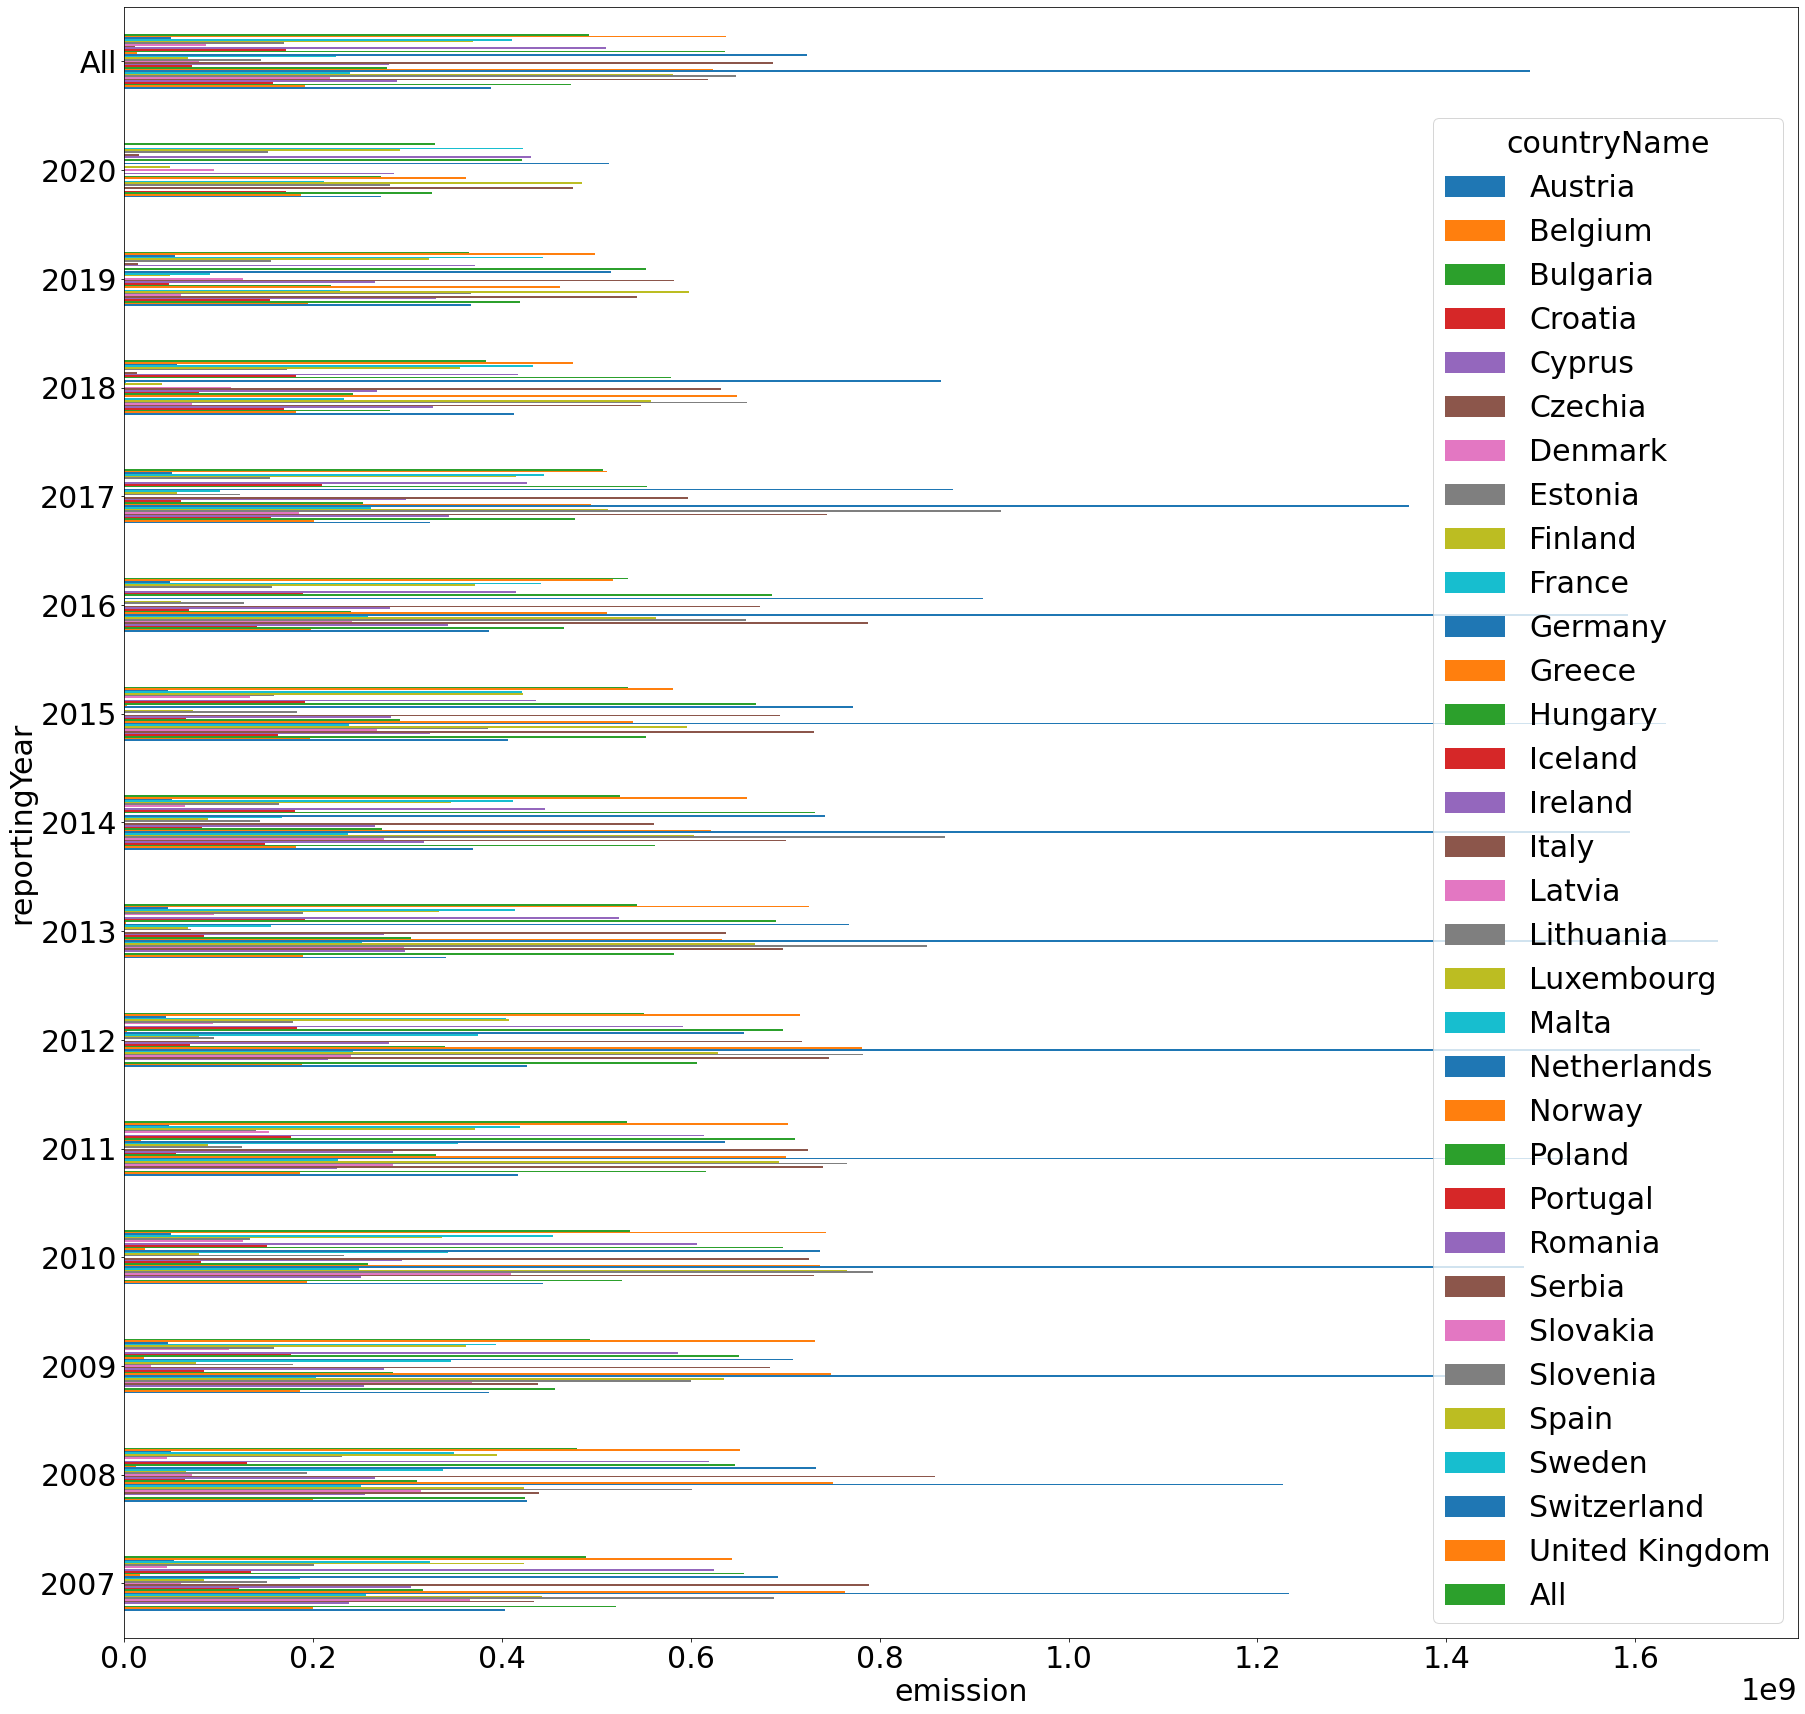

In [51]:
plt.figure()
plt.rcParams.update({'font.size': 30})
df_emission_year = df_air.pivot_table('emissions', index='reportingYear',columns=['countryName'],margins=True)
df_emission_year.plot.barh(figsize=(30,30))
plt.xlabel("emission")
df_emission_year.head()

L'émission moyenne par secteur pour tous les pays (air)

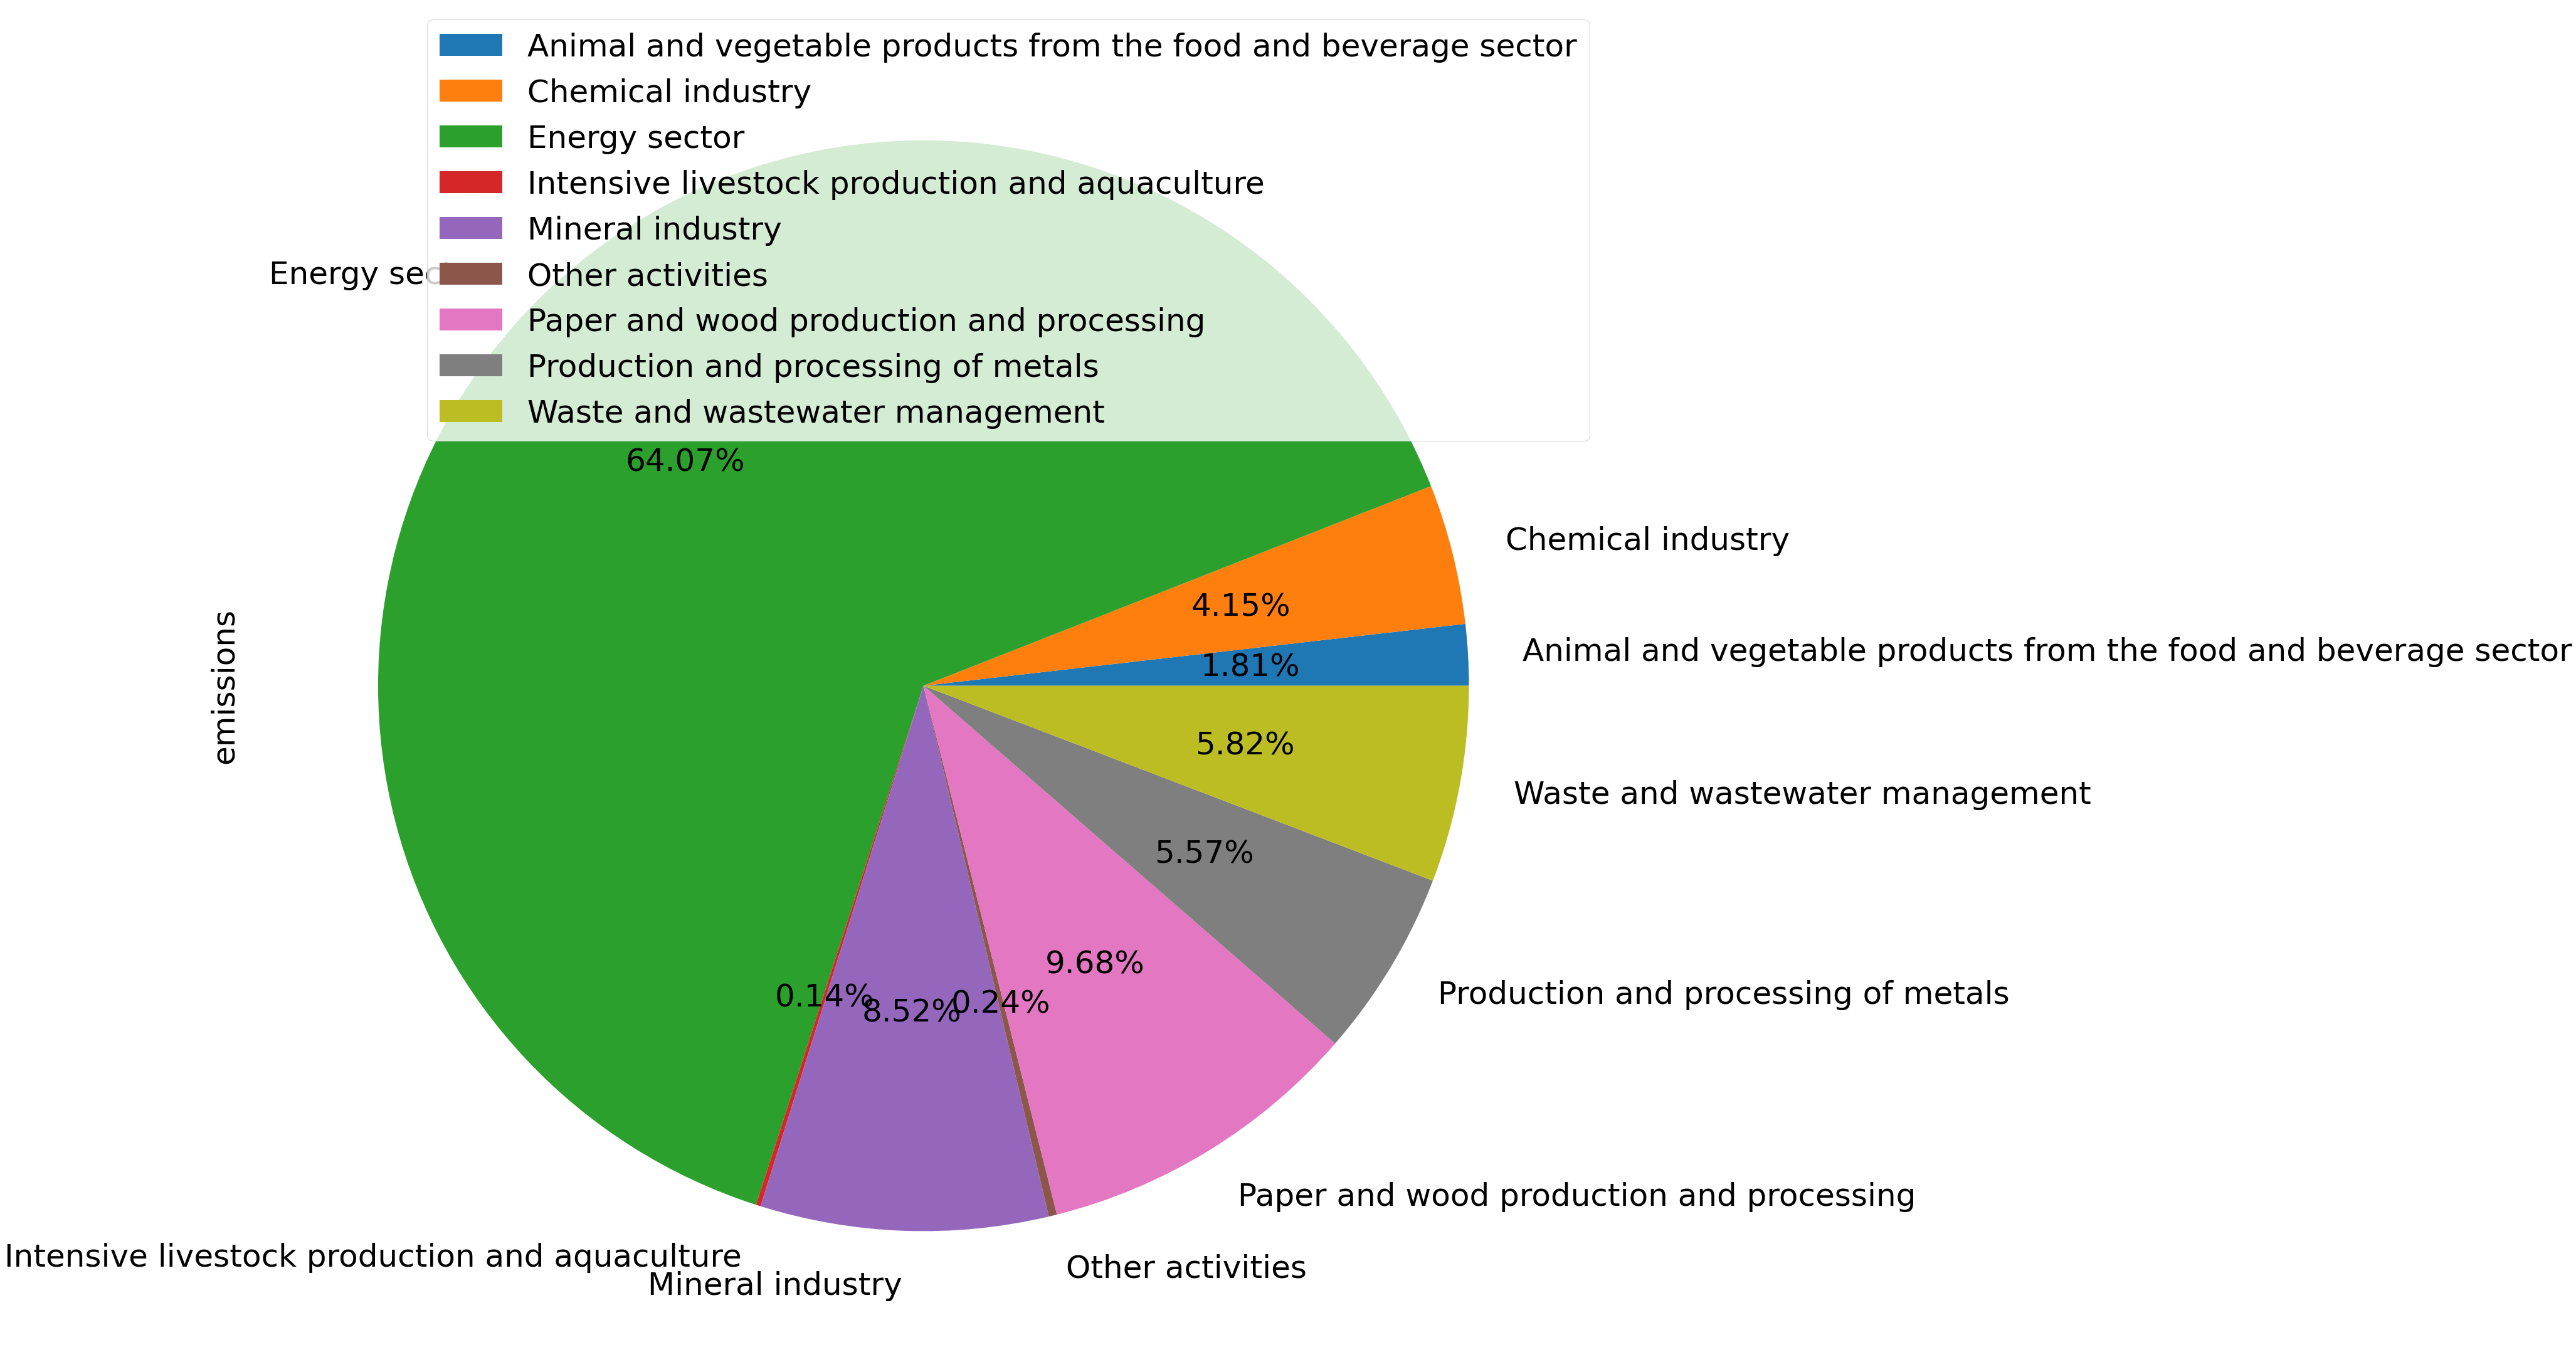

In [61]:
df_sect_emissions = df_air.groupby(["eprtrSectorName"]).mean()["emissions"]
df_sect_emissions.plot.pie(y="emissions",figsize=(40,40),autopct='%.2f%%')

L'émission moyenne par pays (air)

C:\Users\aurel\AppData\Local\Temp\ipykernel_24264\461666589.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


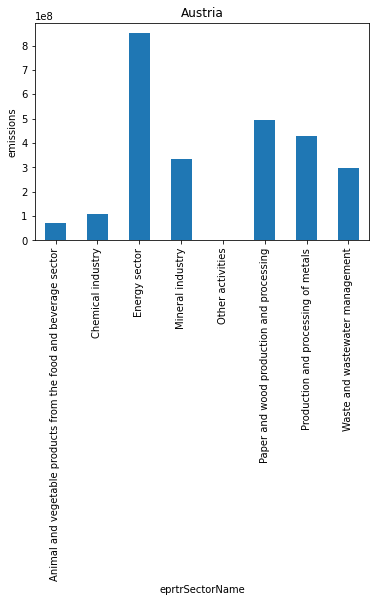

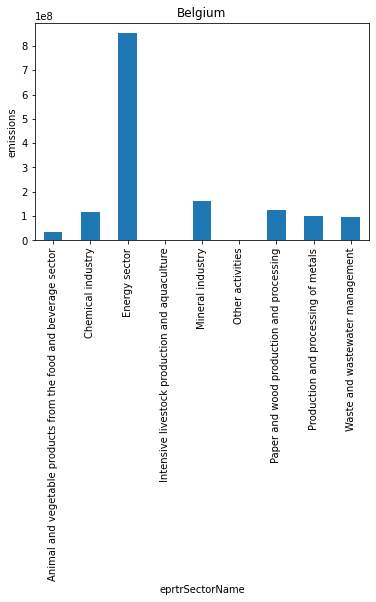

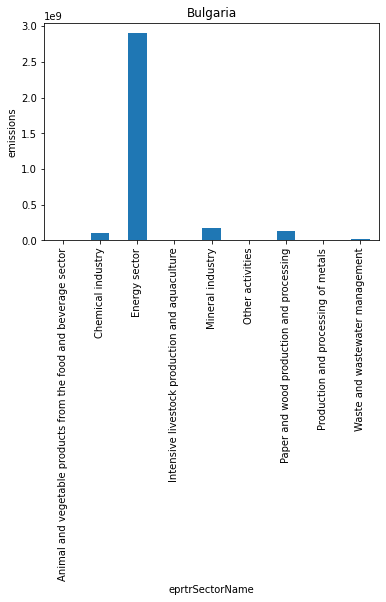

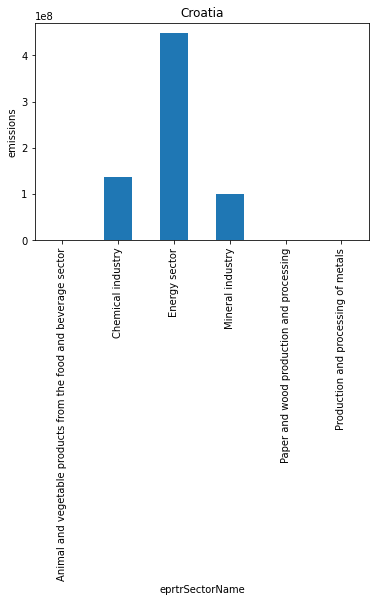

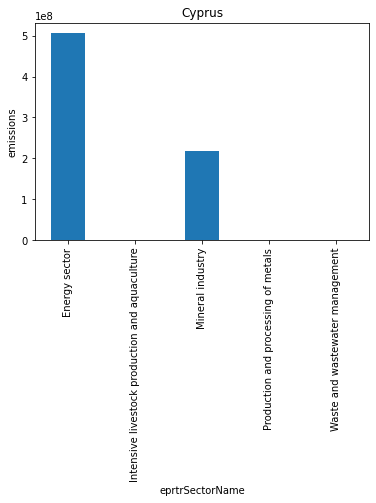

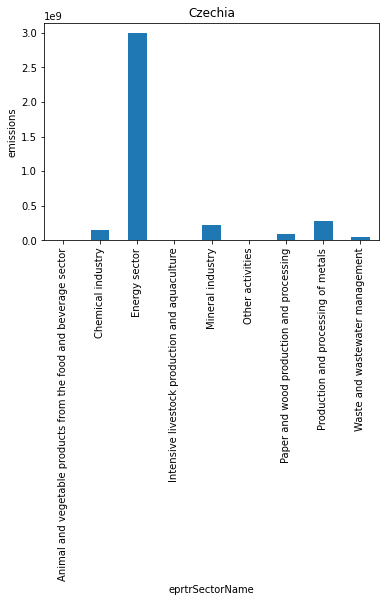

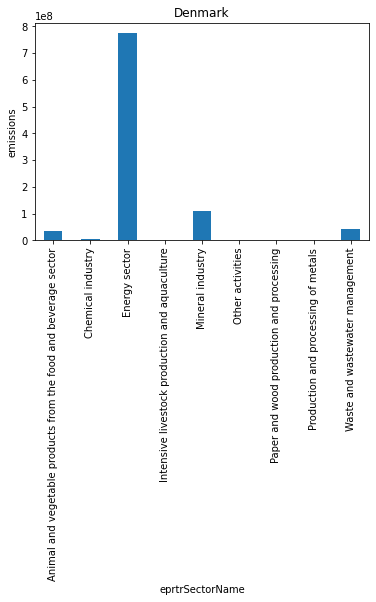

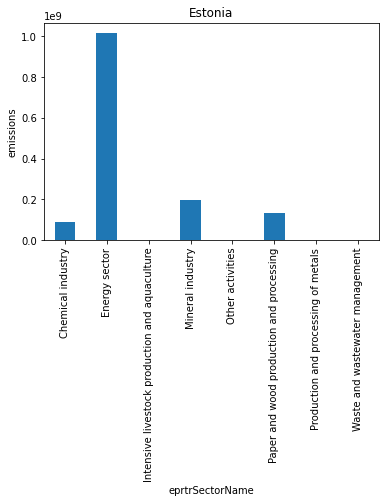

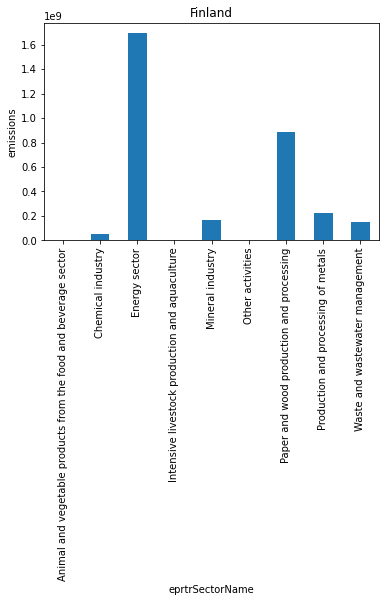

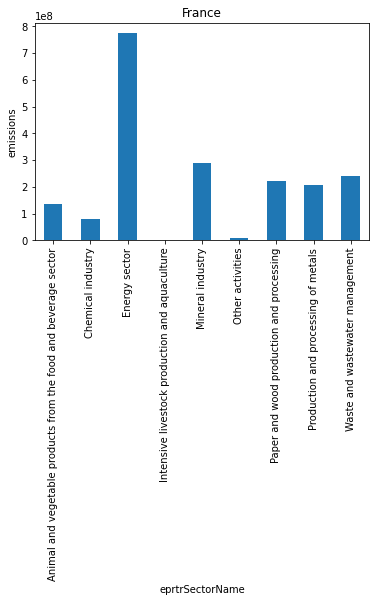

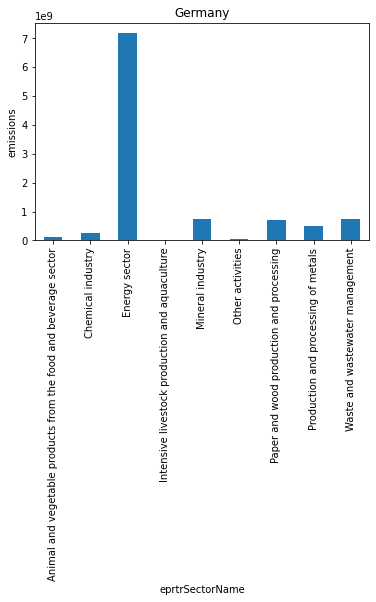

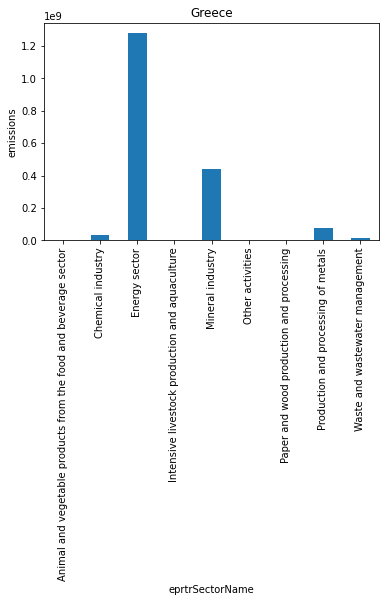

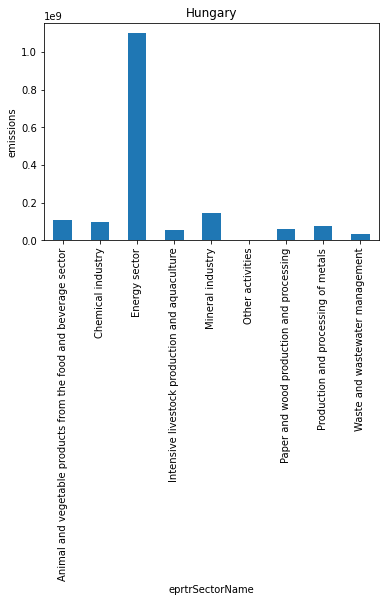

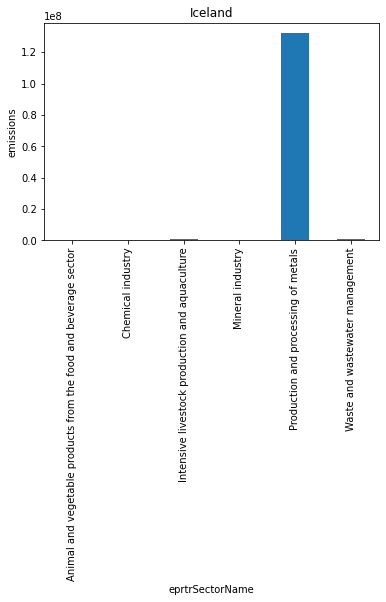

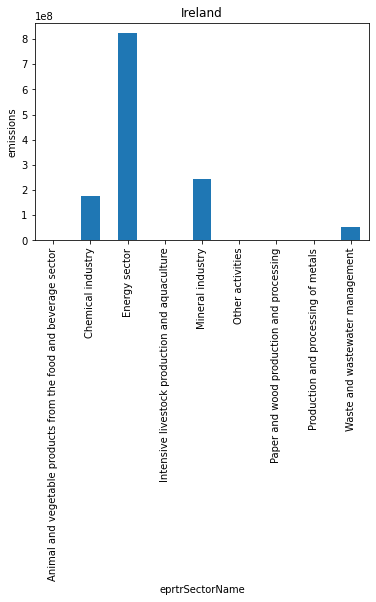

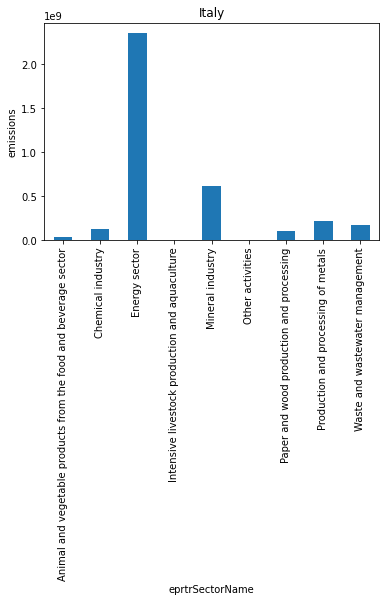

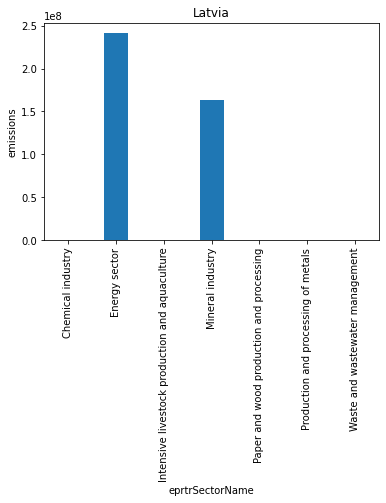

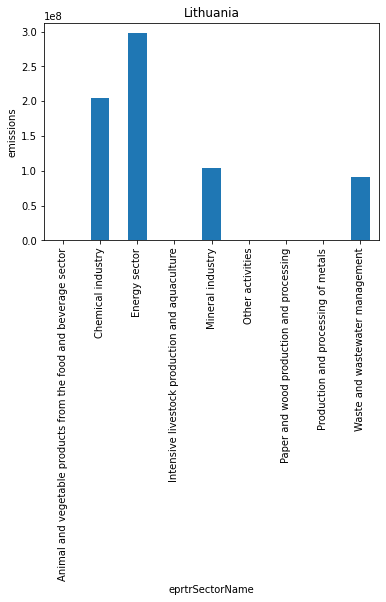

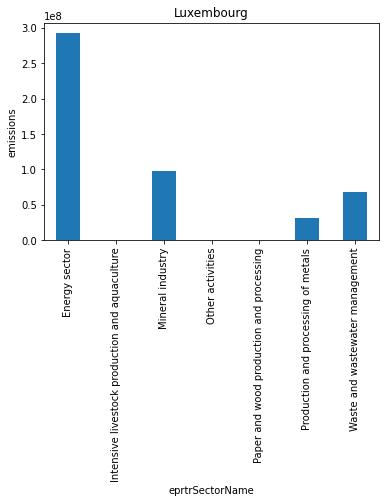

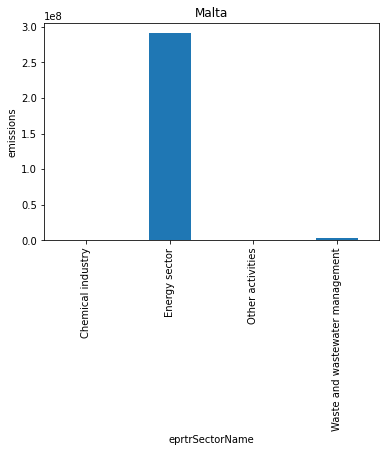

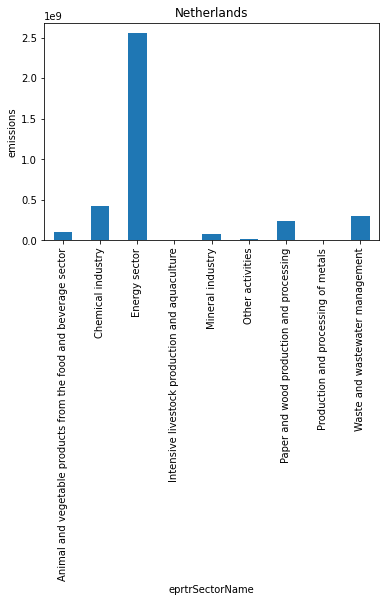

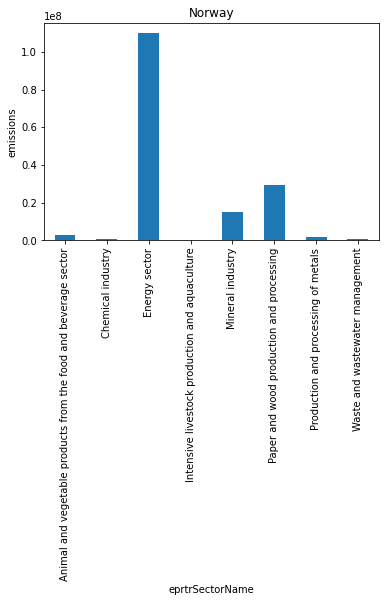

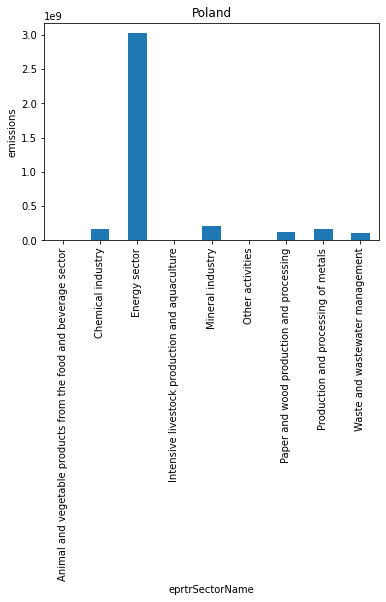

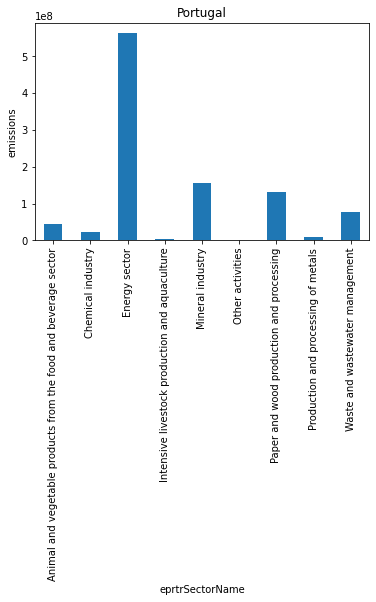

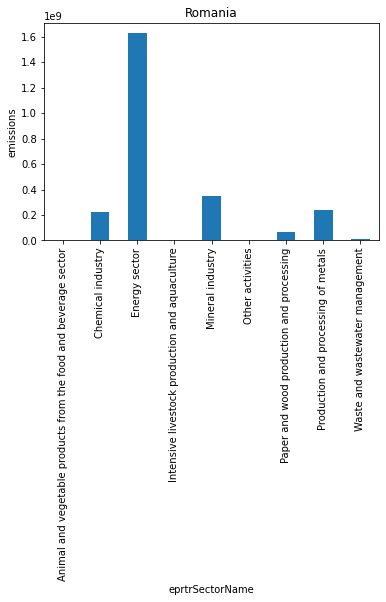

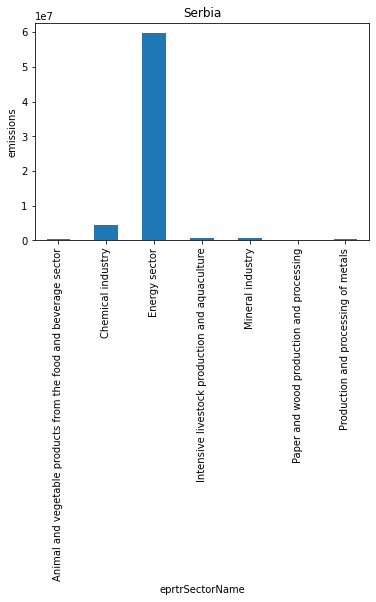

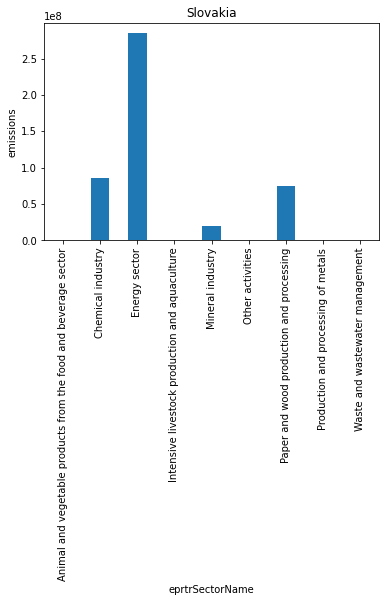

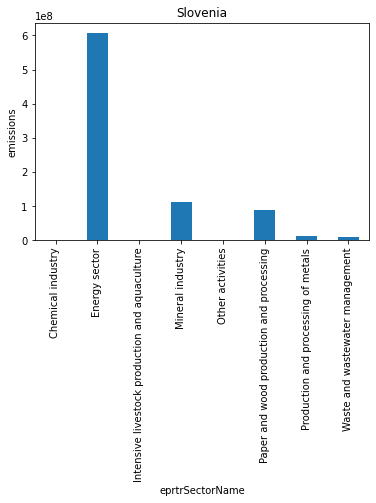

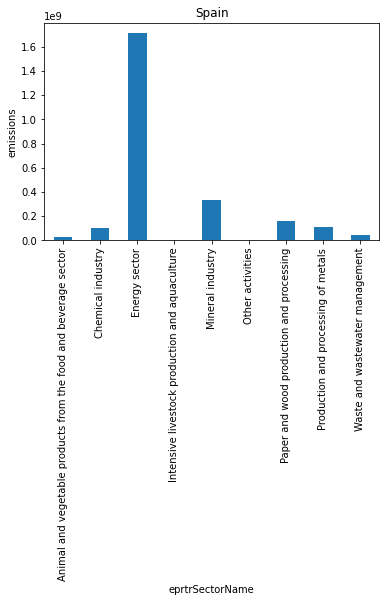

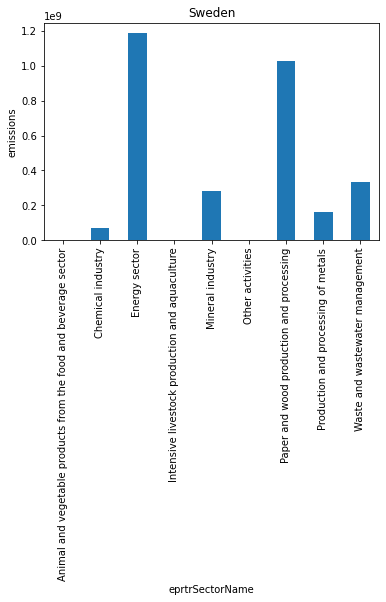

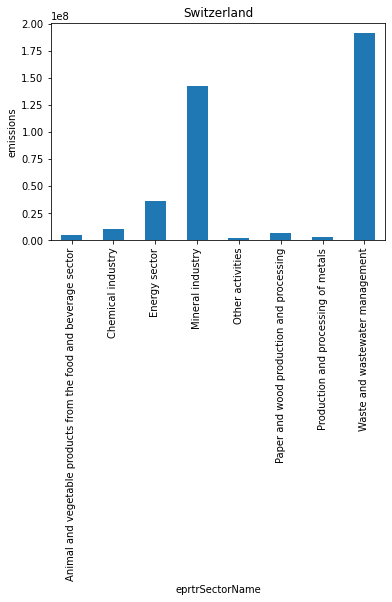

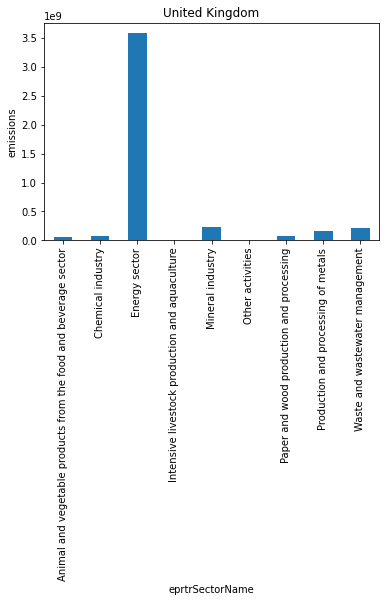

In [16]:
countries = df_air.countryName.unique()
for country in countries:
    df = df_air[df_air.countryName == country].groupby("eprtrSectorName").mean()["emissions"]
    plt.figure()
    df.plot.bar()
    plt.ylabel("emissions")
    plt.title(country)

L'emission moyenne par polluant (air)

pollutant
Carbon dioxide (CO2)                      4.999887e+09
Carbon dioxide (CO2) excluding biomass    3.109397e+09
Carbon monoxide (CO)                      1.542753e+07
Methane (CH4)                             1.160121e+07
Nitrogen oxides (NOX)                     5.209252e+06
Name: emissions, dtype: float64

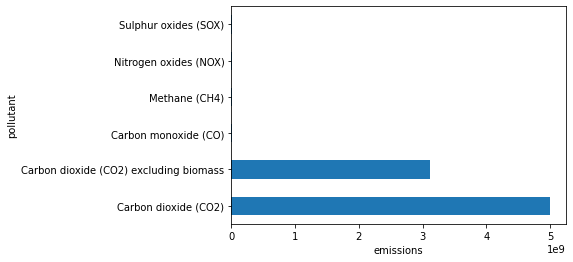

In [31]:
df_pollutant_emissions = df_air.groupby(["pollutant"]).mean()["emissions"]
df_pollutant_emissions = df_pollutant_emissions[df_pollutant_emissions>4000000]
df_pollutant_emissions.plot.barh()
plt.xlabel("emissions")
df_pollutant_emissions.head()

L'emission moyenne par polluant par pays(air)

C:\Users\aurel\AppData\Local\Temp\ipykernel_24264\3743851254.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


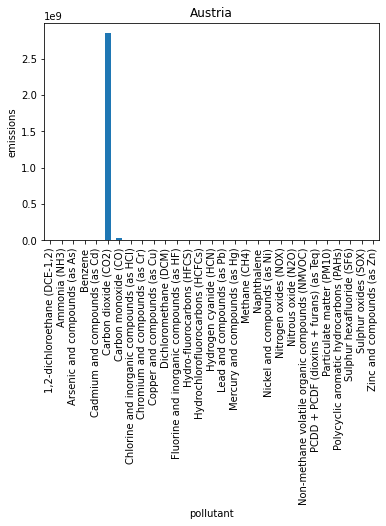

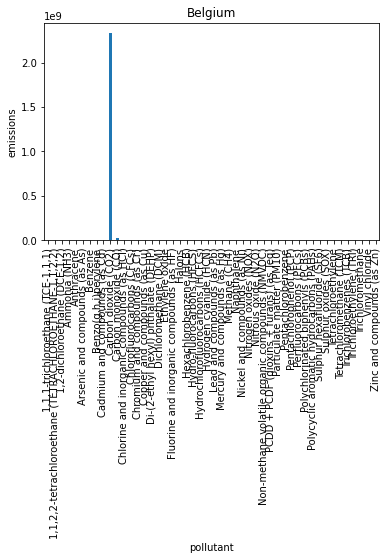

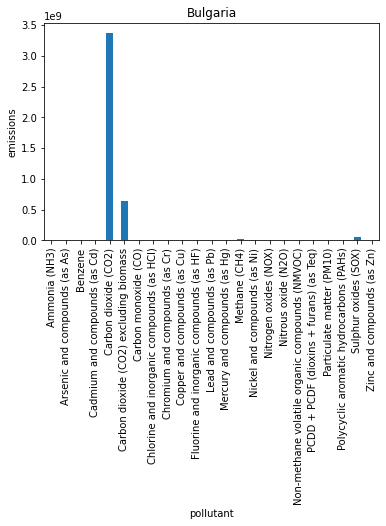

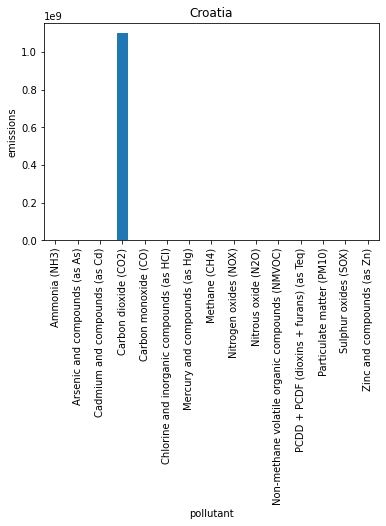

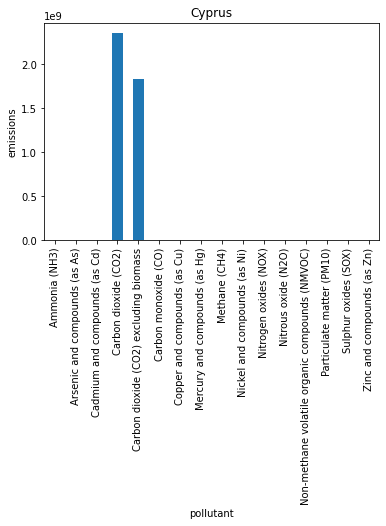

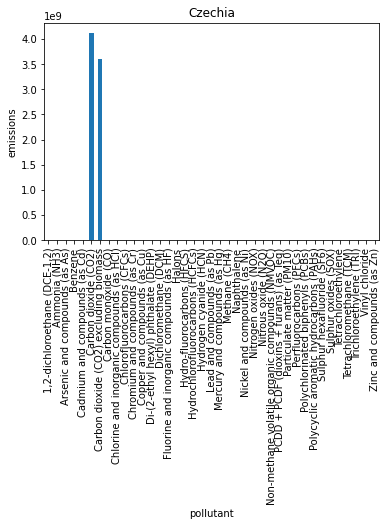

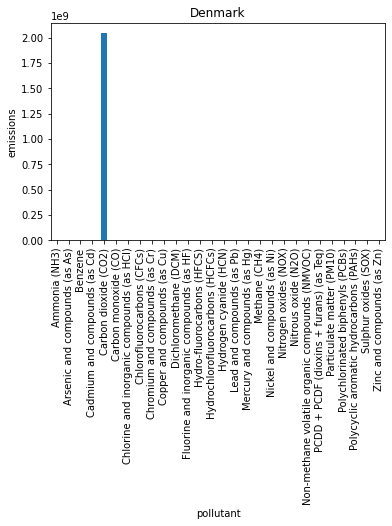

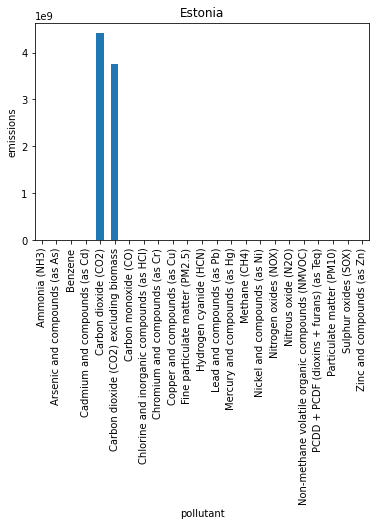

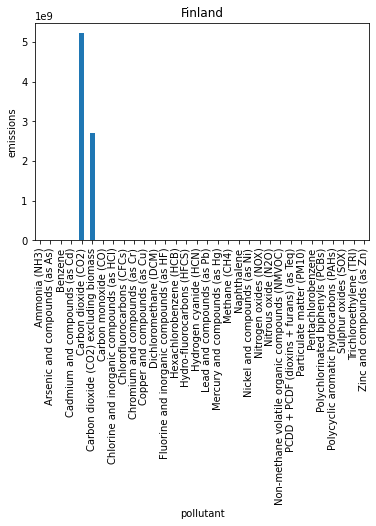

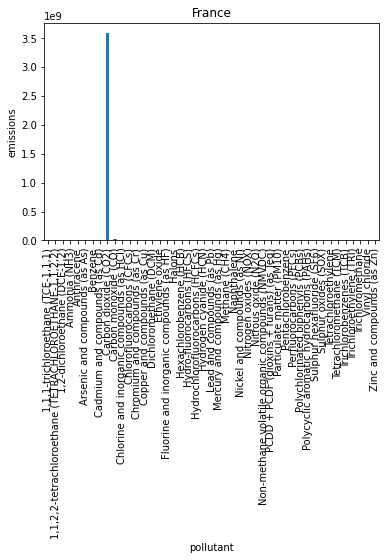

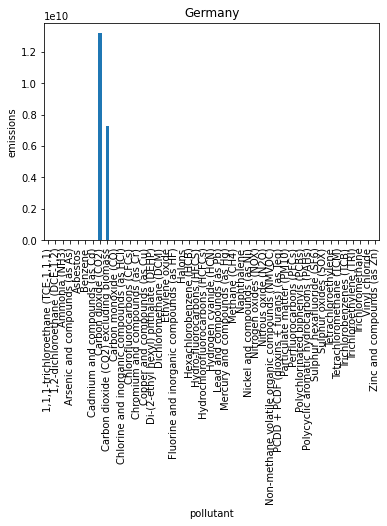

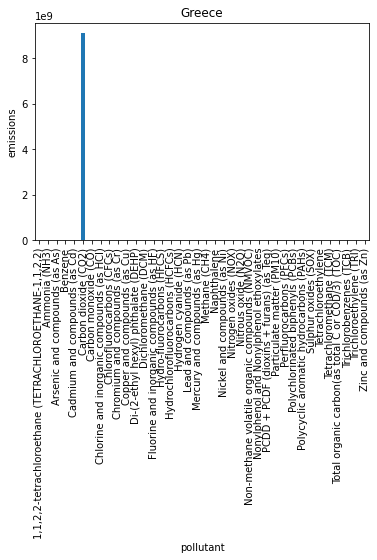

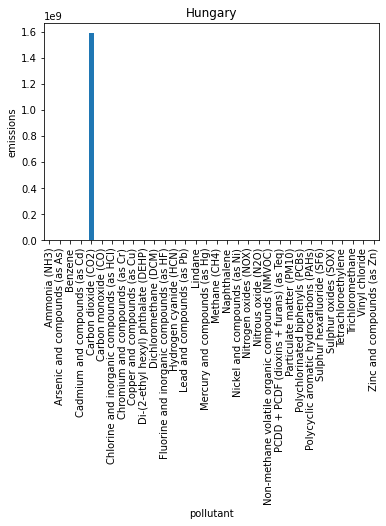

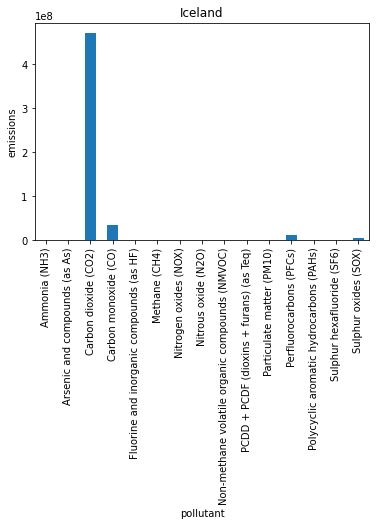

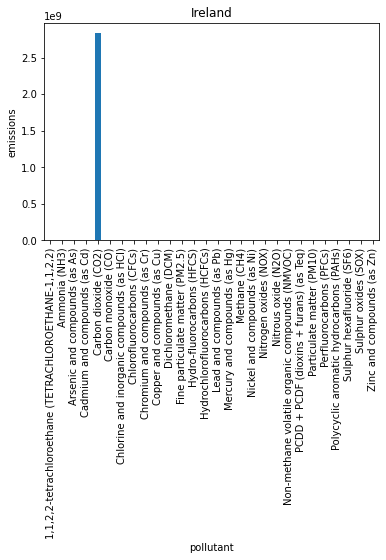

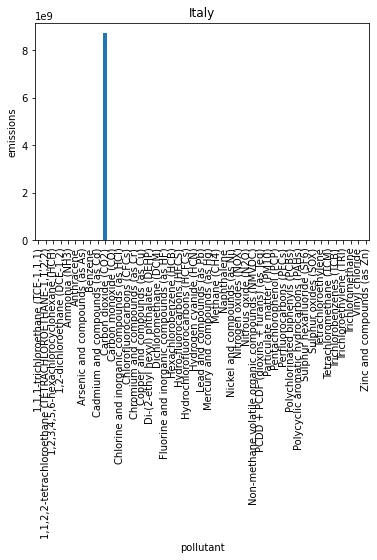

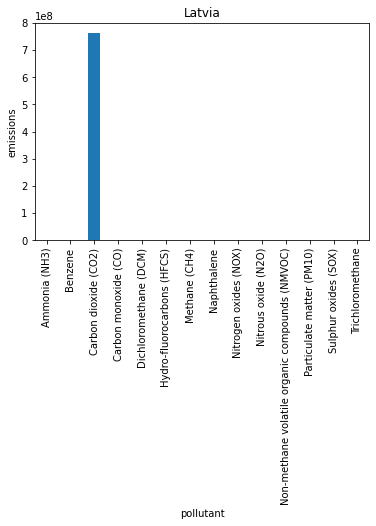

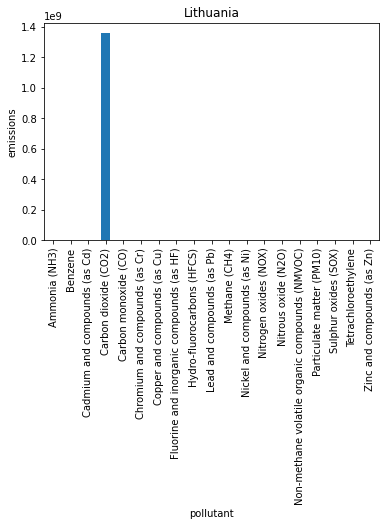

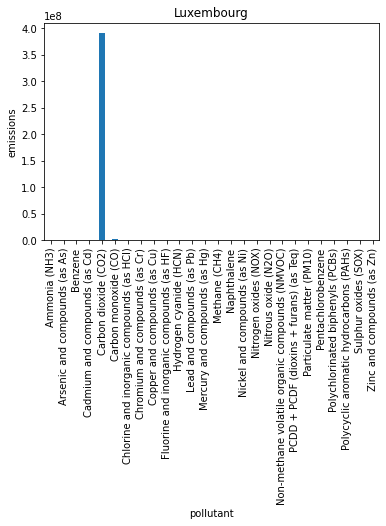

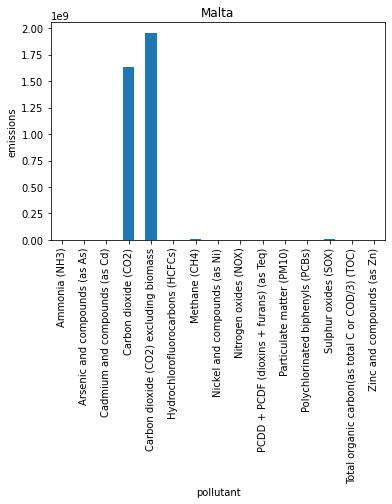

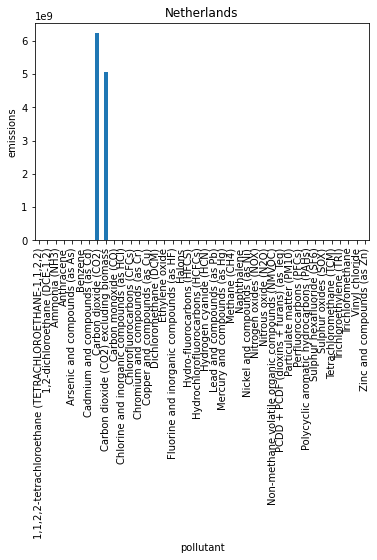

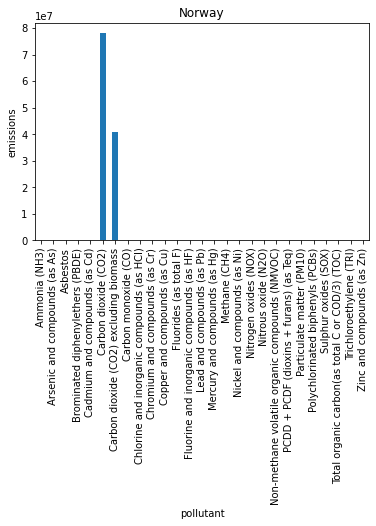

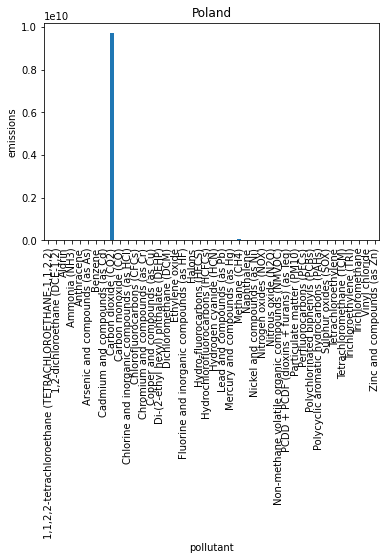

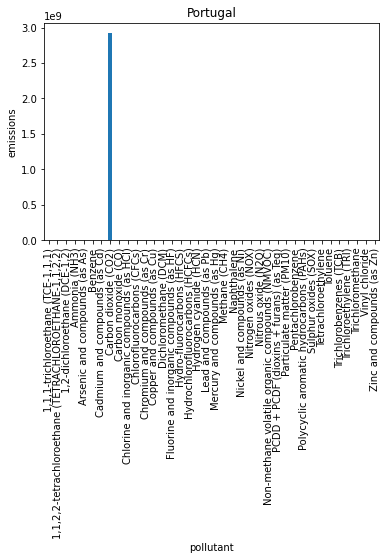

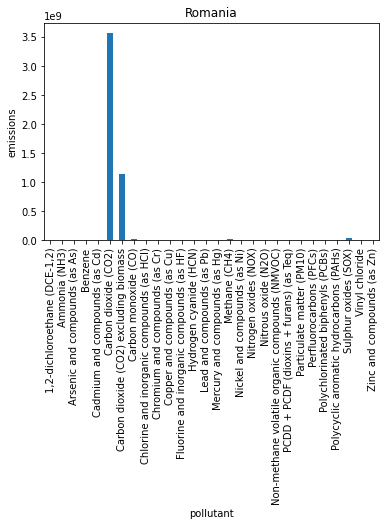

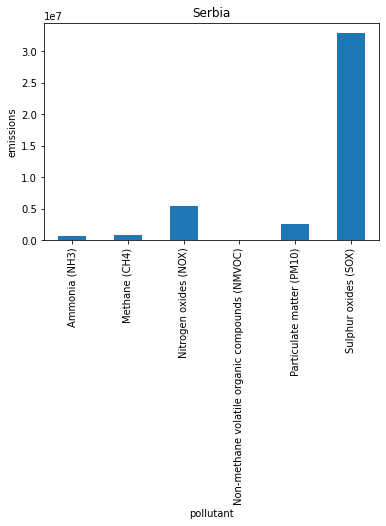

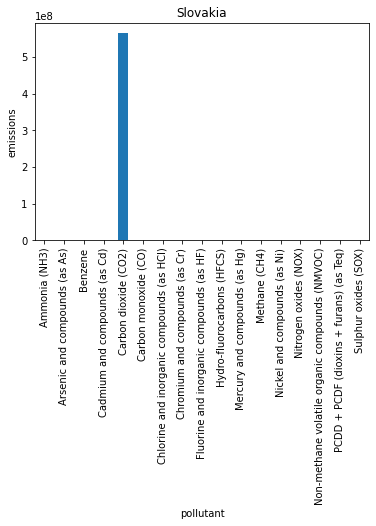

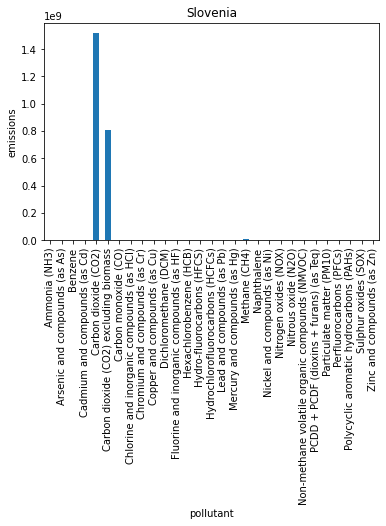

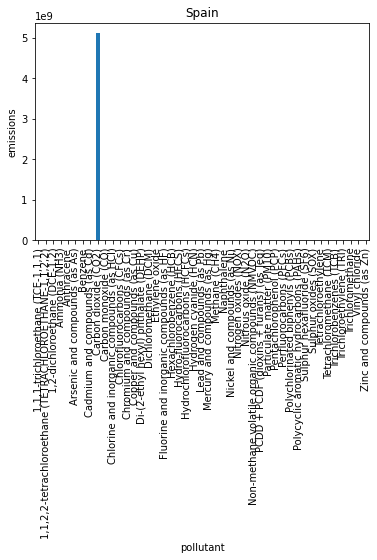

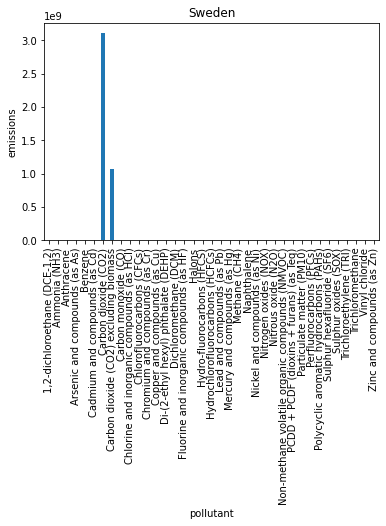

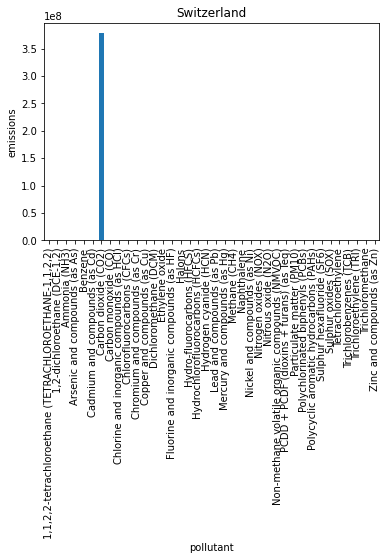

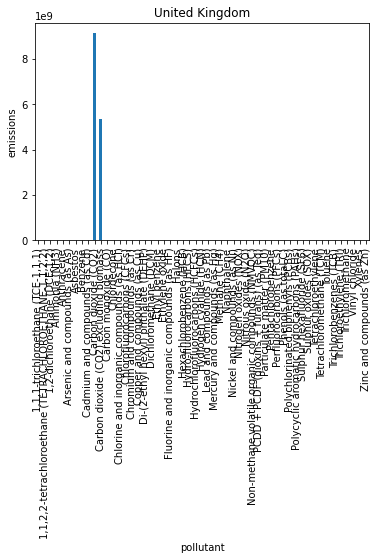

In [18]:
for country in countries:
    df = df_air[df_air.countryName == country].groupby("pollutant").mean()["emissions"]
    plt.figure()
    df.plot.bar()
    plt.ylabel("emissions")
    plt.title(country)